EXPLORATORY DATA ANALYSIS ON DATASET SAMPLESUPERSTORE
@SPARKS FOUNDATION
THIS NOTEBOOK HELPS IN FINDING THE WEAK AREAS WHERE BUSINESS PEOPLE
NEED TO WORK IN ORDER TO MAKE MORE PROFIT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
df=pd.read_csv('SampleSuperstore.csv')

In [30]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [25]:
df.dropna(inplace=True)

In [26]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [27]:
for cols in df.columns:
    
    print(cols)
    print(df[cols].value_counts())

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
Country
United States    9994
Name: Country, dtype: int64
City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64
State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colora

In [33]:
cv=df['State'].value_counts()

In [34]:
dfcv=pd.DataFrame({'State':cv.index,'Items':cv.values})

In [35]:
dfcv.head()

,State,Items
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506


In [116]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [47]:
dfc.head()

,State,Postal Code,Sales,Quantity,Discount,Profit,Loss
0,Alabama,2195669,19510.6400,256,0.0,5786.8253,0.0000
1,Arizona,19102126,35282.0010,862,68.0,3228.8429,6656.7675
2,Arkansas,4339309,11678.1300,240,0.0,4008.6871,0.0000
3,California,184382639,457687.6315,7667,145.6,80151.0522,3769.6651
4,Colorado,14613828,32108.1180,693,57.6,2373.0469,8900.9048


In [43]:
dfc[dfc['Profit']==dfc['Profit'].max()]['State']

3    California
Name: State, dtype: object

In [44]:
dfc[dfc['Loss']==dfc['Loss'].max()]['State']

41    Texas
Name: State, dtype: object

In [49]:
print("states where loss in more than profit")
dfc[dfc['Loss']>dfc['Profit']]['State']

states where loss in more than profit


1            Arizona
4           Colorado
8            Florida
11          Illinois
31    North Carolina
33              Ohio
35            Oregon
36      Pennsylvania
40         Tennessee
41             Texas
Name: State, dtype: object

state with highest loss: Texas

state with highest profit: California
    
states where loss is more than profit
1            Arizona
4           Colorado
8            Florida
11          Illinois
31    North Carolina
33              Ohio
35            Oregon
36      Pennsylvania
40         Tennessee
41             Texas

In [36]:
dfc=df.groupby('State').sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27980\4170544473.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfc=df.groupby('State').sum()


In [41]:
dfc=dfc.reset_index()

In [110]:
dfsc=df.groupby('State').count()

In [114]:
dfc=pd.merge(dfc,dfcv,how='inner',on='State')

In [106]:
dfc=dfc.reset_index

In [118]:
dfc['Sales'].mean()

46881.65021020409

In [120]:
dfc['Sales'].max()

457687.6315

In [119]:
dfc['Sales'].min()

919.91

In [138]:
dfc['cat_q']=dfc['Quantity'].apply(lambda x:'higher quantity' if x>dfc['Quantity'].mean() else 'lower Quantity')

In [123]:
dfc['cat_s'].value_counts()

lower sales     36
higher sales    13
Name: cat_s, dtype: int64

In [17]:
dfc.head()

,Postal Code,Sales,Quantity,Discount,Profit,Loss
State,,,,,,
Alabama,2195669,19510.6400,256,0.0,5786.8253,0.0000
Arizona,19102126,35282.0010,862,68.0,3228.8429,-6656.7675
Arkansas,4339309,11678.1300,240,0.0,4008.6871,0.0000
California,184382639,457687.6315,7667,145.6,80151.0522,-3769.6651
Colorado,14613828,32108.1180,693,57.6,2373.0469,-8900.9048


In [22]:
dfc.reset_index()

,State,Postal Code,Sales,Quantity,Discount,Profit,Loss
0,Alabama,2195669,19510.6400,256,0.00,5786.8253,0.0000
1,Arizona,19102126,35282.0010,862,68.00,3228.8429,-6656.7675
2,Arkansas,4339309,11678.1300,240,0.00,4008.6871,0.0000
3,California,184382639,457687.6315,7667,145.60,80151.0522,-3769.6651
4,Colorado,14613828,32108.1180,693,57.60,2373.0469,-8900.9048
5,Connecticut,531005,13384.3570,281,0.60,3531.1064,-19.6146
6,Delaware,1896504,27451.0690,367,0.60,10063.2711,-85.8963
7,District of Columbia,200160,2865.0200,40,0.00,1059.5893,0.0000
8,Florida,12640225,89473.7080,1379,114.65,5290.5278,-8689.8295
9,Georgia,5685480,49095.8400,705,0.00,16250.0433,0.0000


In [78]:
dfcv.head()

,State,Items
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506


In [13]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Loss
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,44.279398,-15.622502
std,32063.693350,623.245101,2.225110,0.206452,193.122144,127.271313
min,1040.000000,0.444000,1.000000,0.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,0.000000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,0.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,0.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.000000


In [13]:
df.drop('Postal Code',axis=1,inplace=True)

<Axes: xlabel='Ship Mode', ylabel='count'>

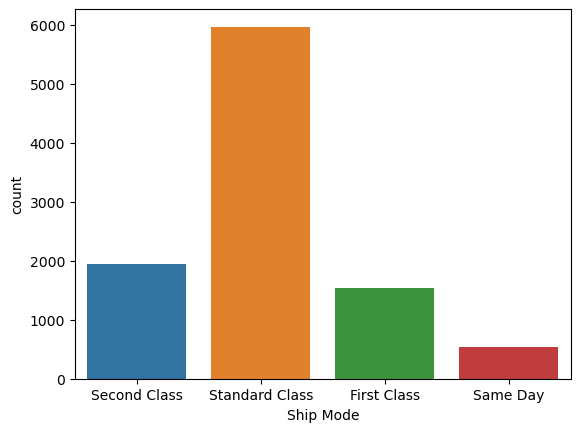

In [14]:
sns.countplot(x='Ship Mode',data=df)

<Axes: xlabel='Ship Mode', ylabel='Loss'>

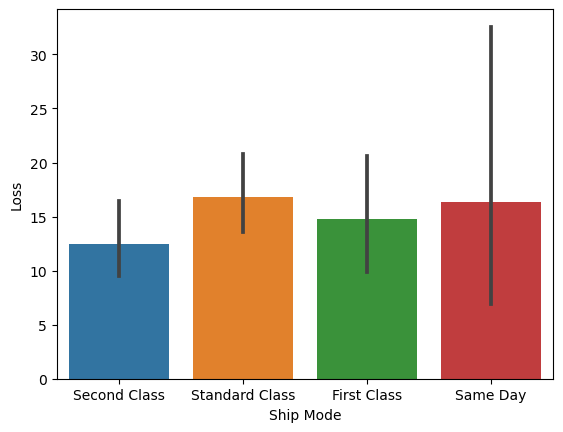

In [37]:
sns.barplot(x='Ship Mode',y='Loss',data=df)

<Axes: xlabel='Ship Mode', ylabel='Profit'>

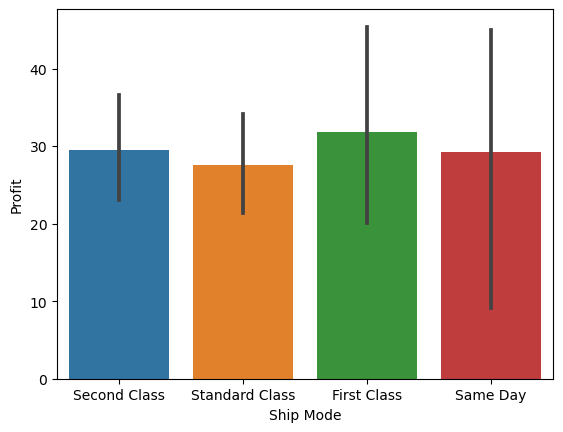

In [22]:
sns.barplot(x='Ship Mode',y='Profit',data=df)

<Axes: xlabel='Ship Mode', ylabel='Profit'>

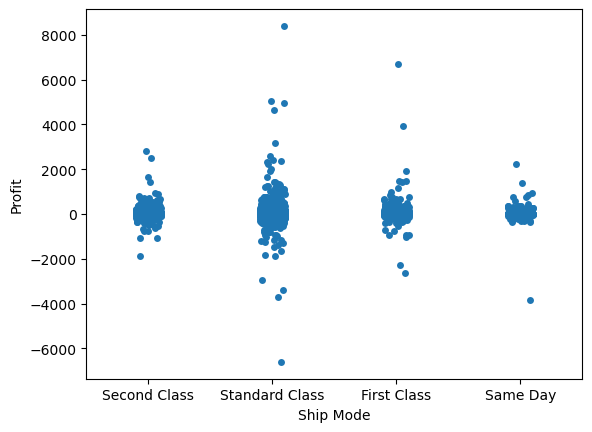

In [23]:
sns.stripplot(x='Ship Mode',y='Profit',data=df)

<Axes: xlabel='Segment', ylabel='Loss'>

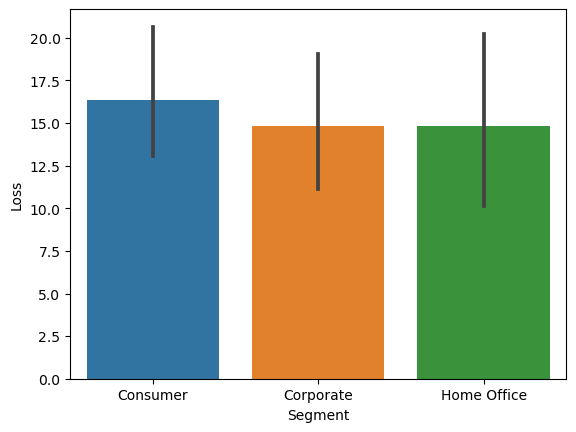

In [38]:
sns.barplot(x='Segment',y='Loss',data=df)

<Axes: xlabel='Segment', ylabel='Profit'>

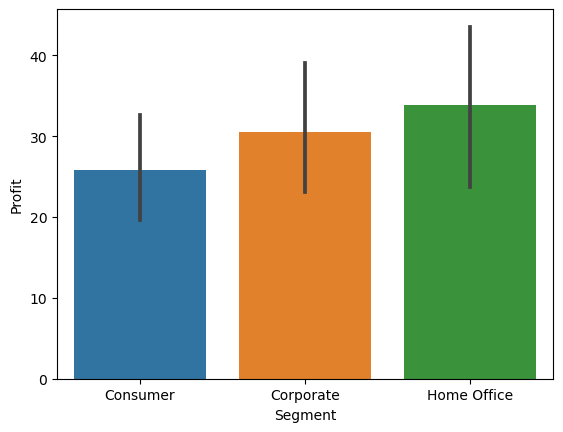

In [24]:
sns.barplot(x='Segment',y='Profit',data=df)

CONSUMER IS POSSESSING MOST LOSS AND LEAST PROFIT SO CONSUMER SEGMENT IS WEAKER THAN OTHER TWO SEGMENTS

<Axes: xlabel='Region', ylabel='Profit'>

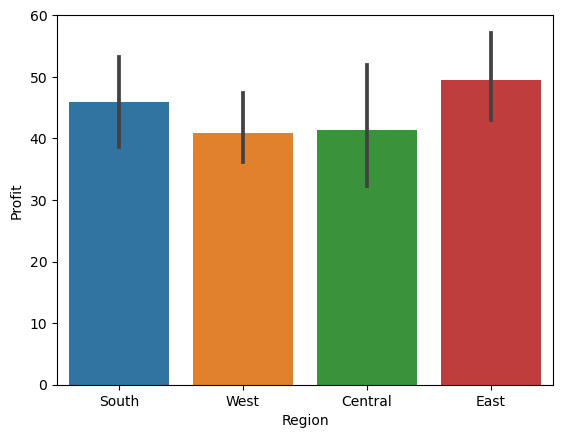

In [39]:
sns.barplot(x='Region',y='Profit',data=df)

<Axes: xlabel='Region', ylabel='Loss'>

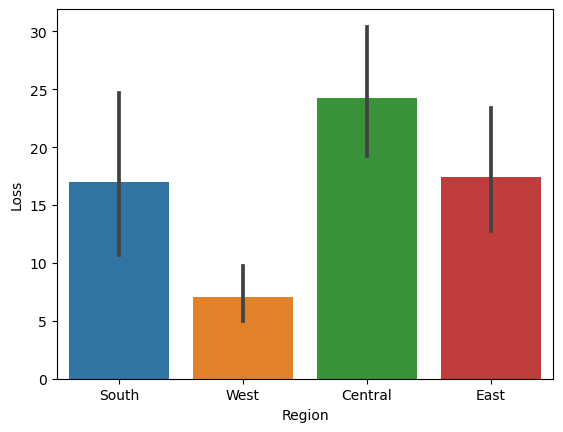

In [40]:
sns.barplot(x='Region',y='Loss',data=df)

CENTRAL REGION IS POSSESSING THE MOST LOSS THAN OTHER REGIONS


In [32]:
df['Profit']=df['Profit'].apply(lambda x:x if x>0 else 0)

In [31]:
df['Loss']=df['Profit'].apply(lambda x:x+(x*(-1))+(x*(-1)) if x<0 else 0)

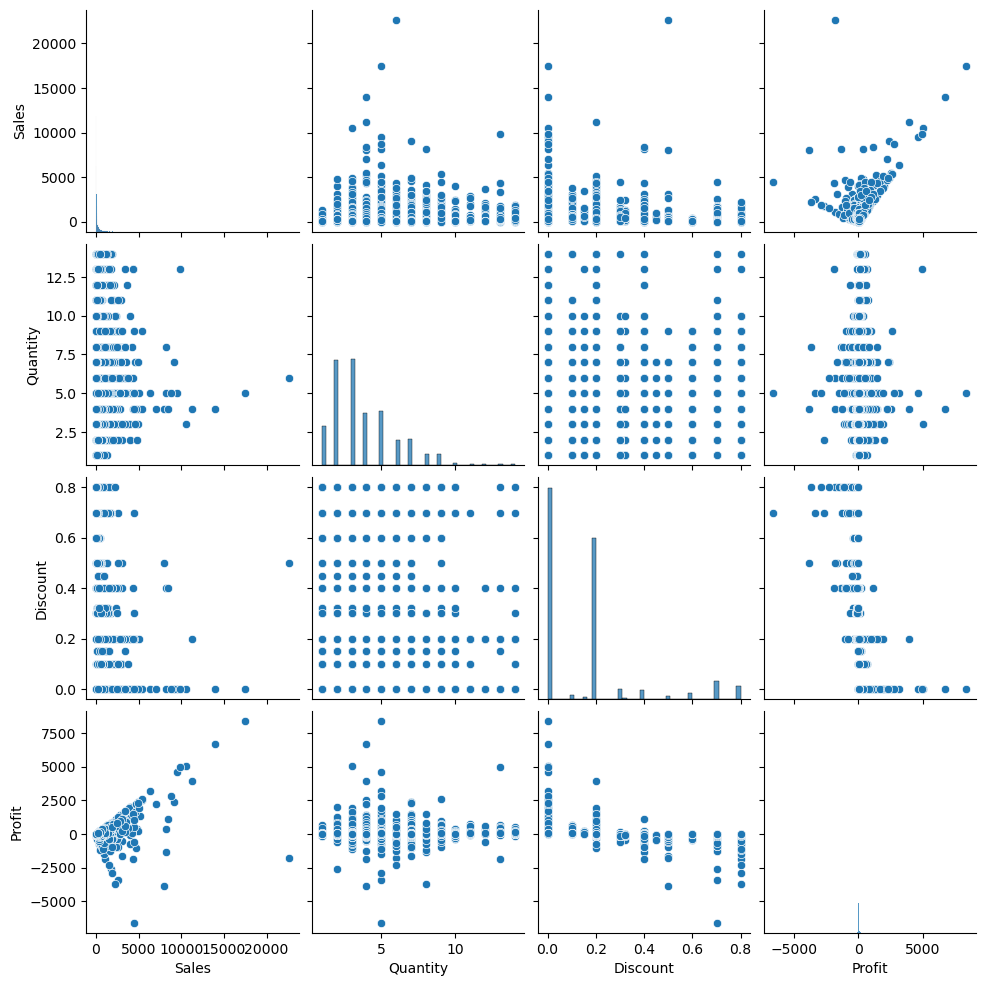

In [21]:
sns.pairplot(df)

In [ ]:
sns.barplot(x='cata_s',y='Loss',data=dfc)

<Axes: xlabel='cat_s', ylabel='Loss'>

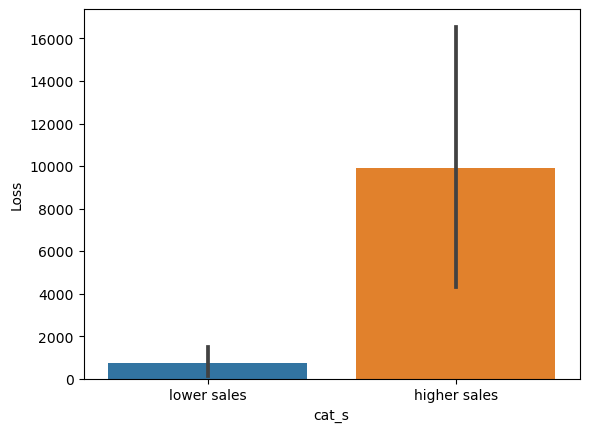

In [126]:
sns.barplot(x='cata_s',y='Loss',data=dfc)

<Axes: xlabel='Category', ylabel='Loss'>

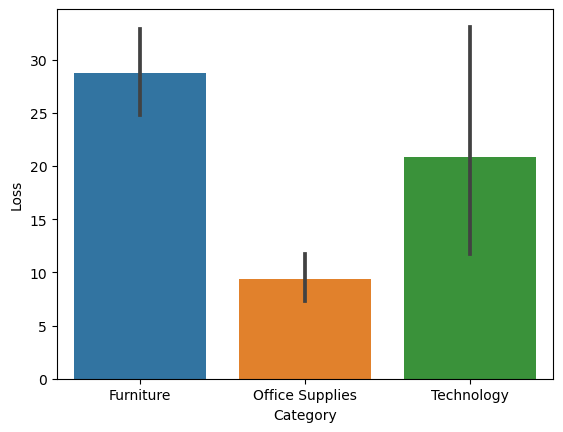

In [158]:
#Category
sns.barplot(x='Category',y='Loss',data=df)

<Axes: xlabel='Category', ylabel='Profit'>

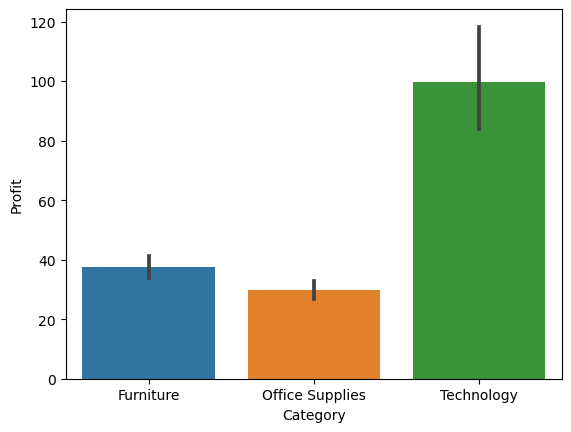

In [159]:
sns.barplot(x='Category',y='Profit',data=df)

FURNITURE CATEGORY IS POSSESSING THE HIGHEST AMOUNT OF LOSS

<Axes: xlabel='Sub-Category', ylabel='Profit'>

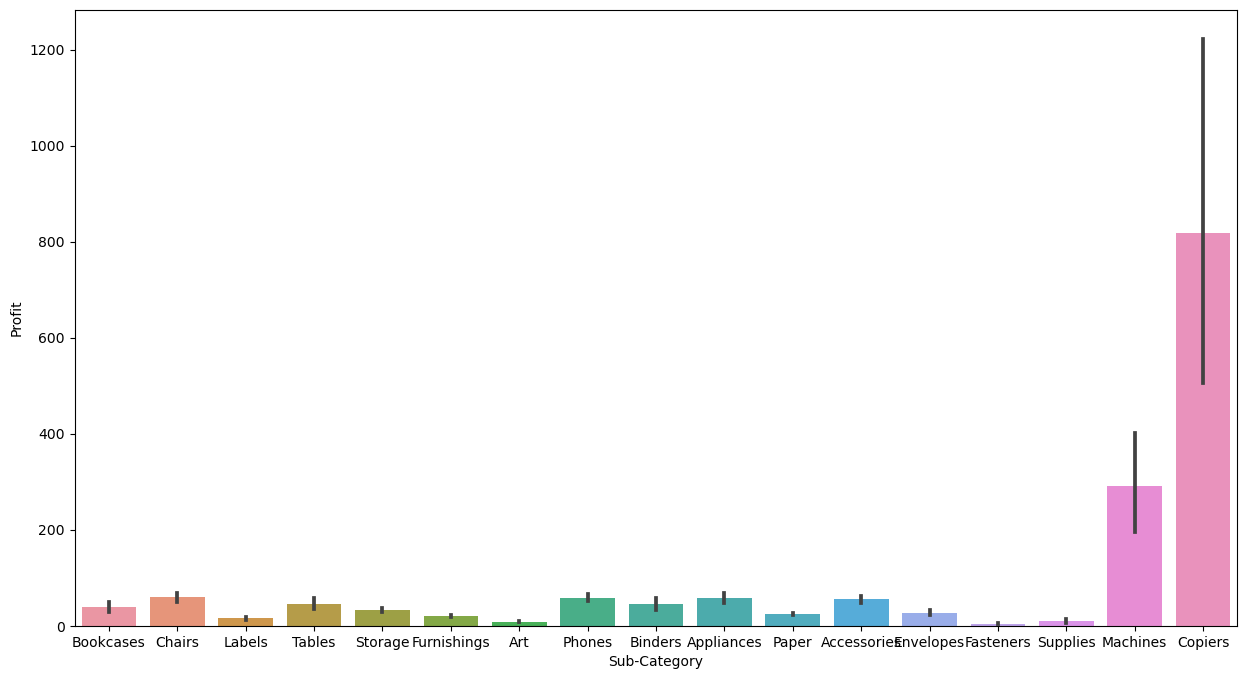

In [164]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 8)


sns.barplot(x='Sub-Category',y='Profit',data=df)

<Axes: xlabel='Sub-Category', ylabel='Loss'>

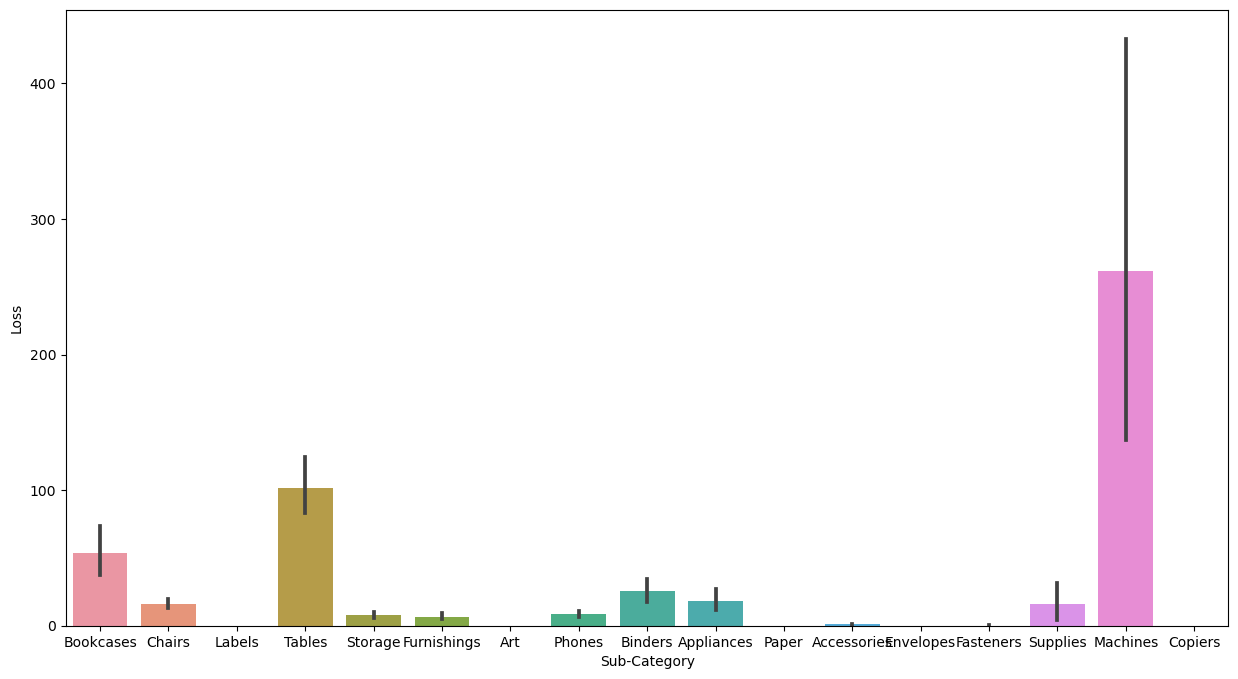

In [165]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 8)


sns.barplot(x='Sub-Category',y='Loss',data=df)

Machines and Copiers are earning higest amount of profit. Bookcases,tabel are sub-categories whose loss is higher than profit
in copiers category there  is no loss and yeilds highest amount of profit!

<Axes: xlabel='cat_s', ylabel='Profit'>

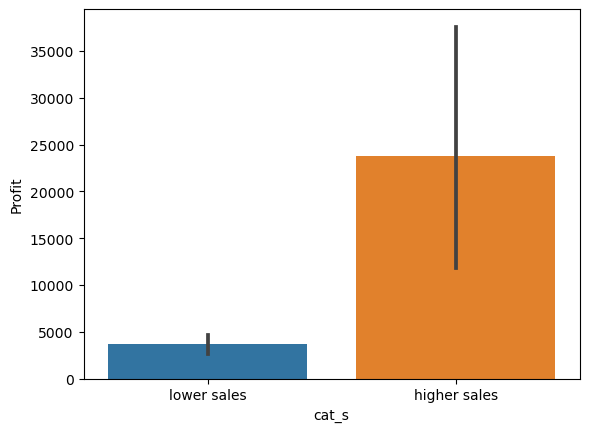

In [136]:
sns.barplot(x='cat_s',y='Profit',data=dfc)

<Axes: xlabel='cat_q', ylabel='Loss'>

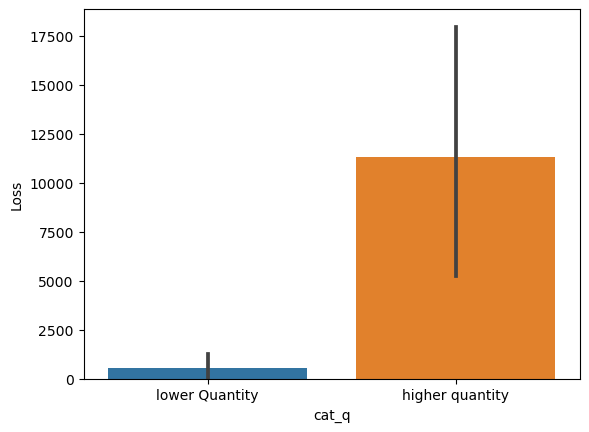

In [141]:
sns.barplot(x='cat_q',y='Loss',data=dfc)

<Axes: xlabel='cat_q', ylabel='Profit'>

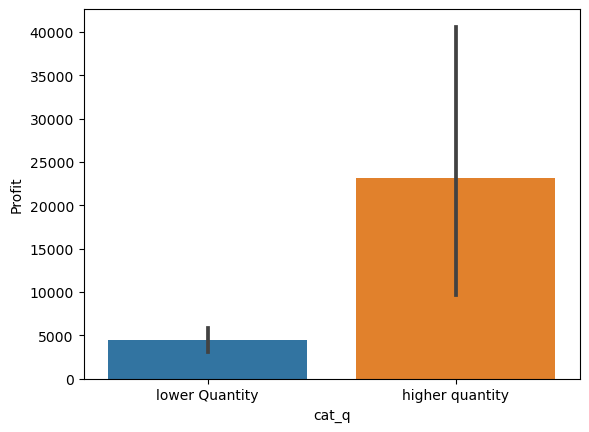

In [142]:
sns.barplot(x='cat_q',y='Profit',data=dfc)

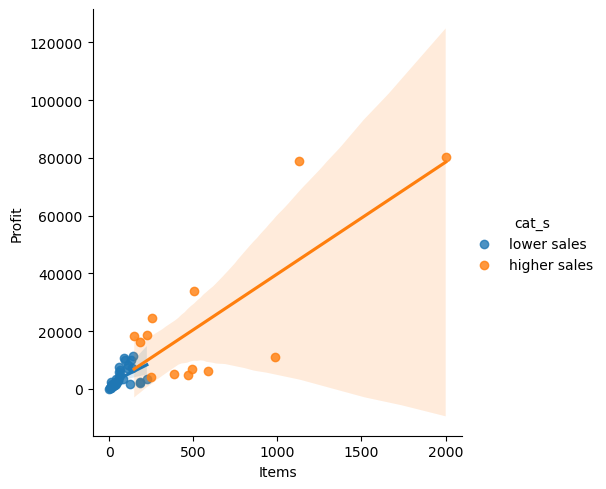

In [144]:
sns.lmplot(x='Items',y='Profit',data=dfc,hue='cat_s')

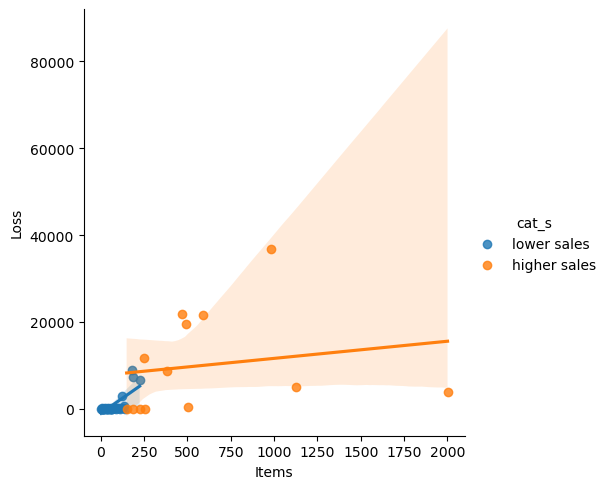

In [145]:
sns.lmplot(x='Items',y='Loss',data=dfc,hue='cat_s')

<Axes: xlabel='cat_q', ylabel='Profit'>

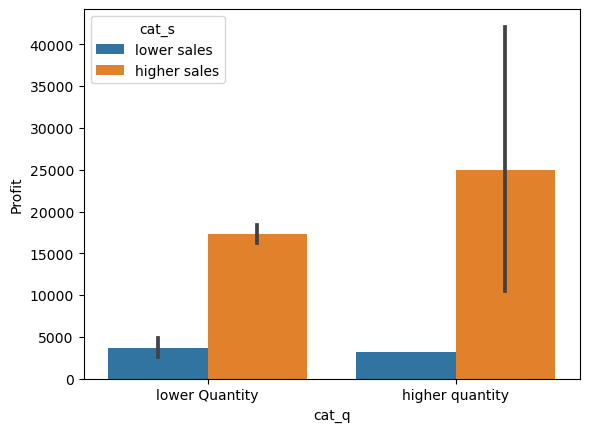

In [146]:
sns.barplot(x='cat_q',y='Profit',data=dfc,hue='cat_s')

<Axes: xlabel='cat_q', ylabel='Loss'>

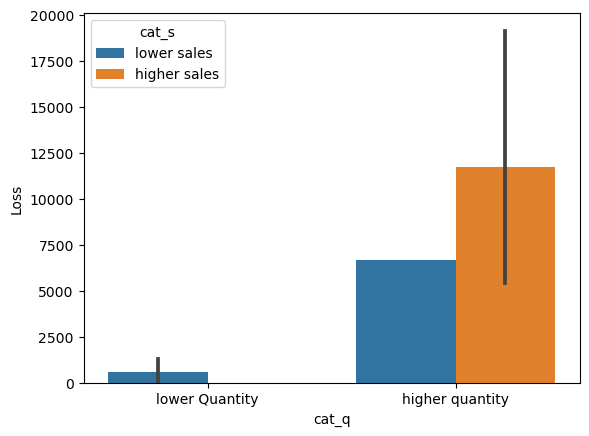

In [147]:
sns.barplot(x='cat_q',y='Loss',data=dfc,hue='cat_s')

<Axes: xlabel='cat_s', ylabel='Loss'>

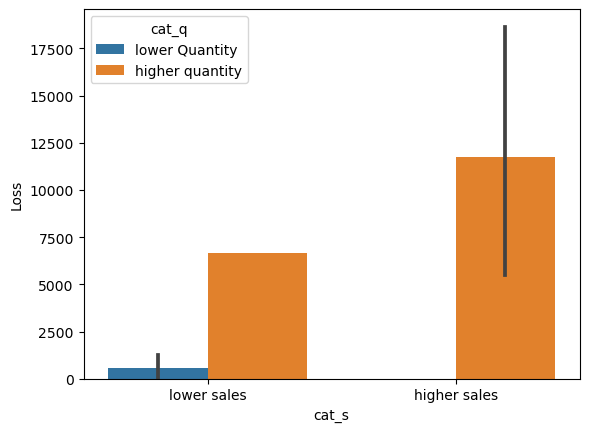

In [149]:
sns.barplot(x='cat_s',y='Loss',data=dfc,hue='cat_q')

<Axes: xlabel='cat_s', ylabel='Profit'>

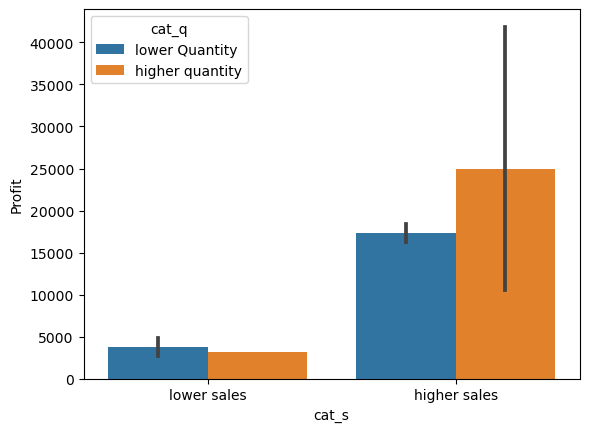

In [150]:
sns.barplot(x='cat_s',y='Profit',data=dfc,hue='cat_q')

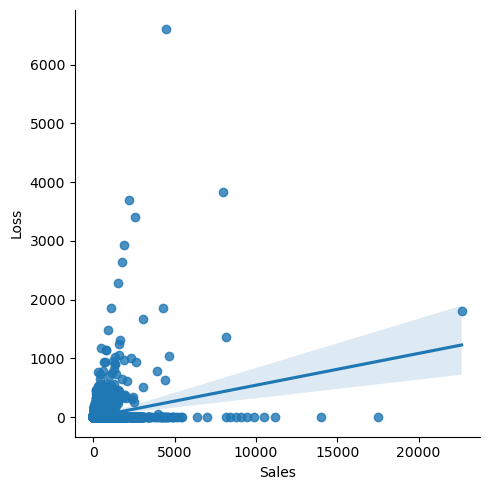

In [151]:
sns.lmplot(x='Sales',y='Loss',data=df)

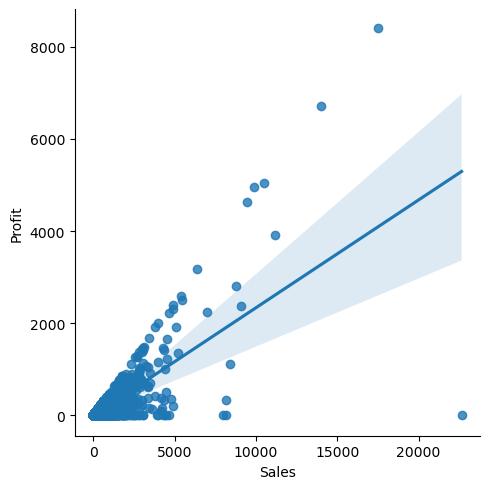

In [152]:
sns.lmplot(x='Sales',y='Profit',data=df)

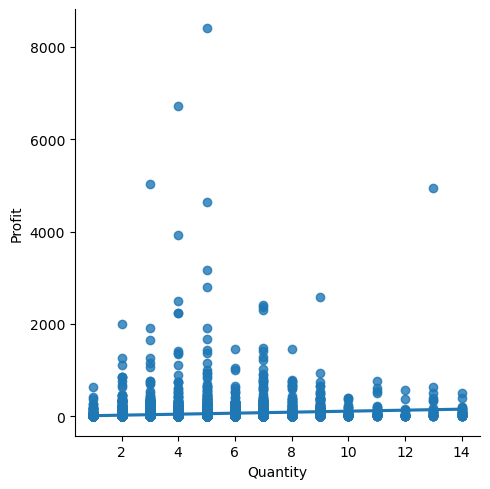

In [153]:
sns.lmplot(x='Quantity',y='Profit',data=df)

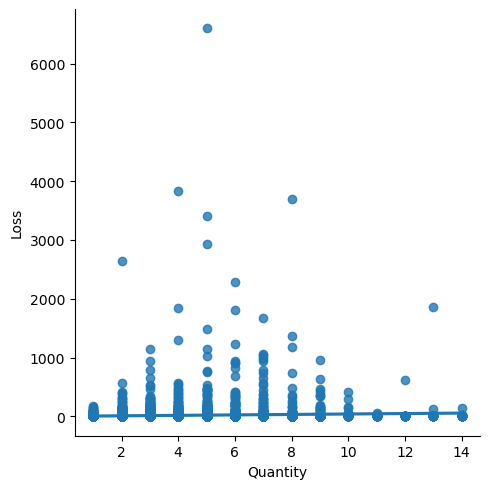

In [156]:
sns.lmplot(x='Quantity',y='Loss',data=df)

HENCE THE COMPANY SHOULD INCREASE THE SALES IN ORDER TO INCREASE PROFIT


PROFIT/LOSS ON AVERAGE DOESN'T DEPEND ON QUANTITY. HOWEVER COMPANIES WITH LOWER QUANTITES AND HIGHER SALES DOESN'T HAVE ANY LOSS


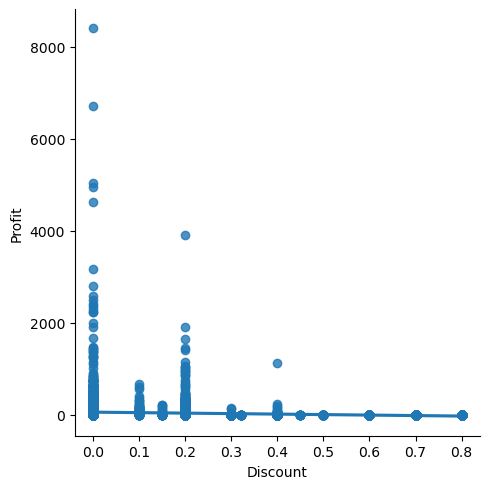

In [160]:
#Discount
sns.lmplot(x='Discount',y='Profit',data=df)

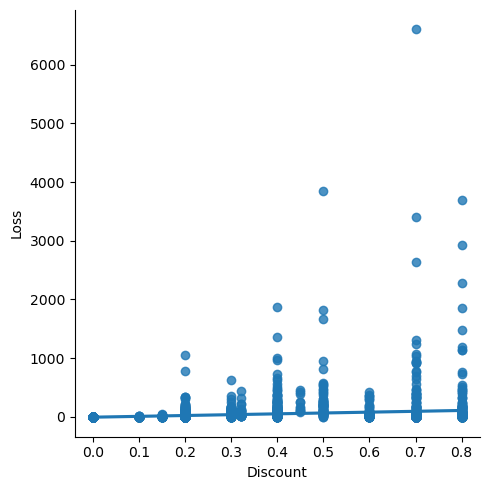

In [161]:
sns.lmplot(x='Discount',y='Loss',data=df)